# Ensemble Learning and Random Forests

*Ensemble Learning*: Train a group of predictors for a single task

*Weak learner*: Model that is only slightly better than random guessing

*Strong learner*: Accurate model

*Main principle*: A large set of weak learners can average to a strong learner, if errors are not "too" dependent.

Aggregation principles:
* Hard Voting
* Soft Voting
* Model based

## Illustration

![Ensemble Training](img/ch7/ensemble_illustration_train.png)

![Ensemble Prediction](img/ch7/ensemble_illustration_prediction.png)

## Underlying principle

If you have a slightly unbalanced coin (51% head), i.e. head is slightly more likely than tails, then there is a 75% chance that after 1000 tosses, the majority of tosses is heads.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
heads_proba = 0.51
n_tosses = 10000
n_trials = 10
np.random.seed(42)

In [17]:
coin_tosses = (np.random.rand(n_tosses, n_trials) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, n_tosses+1).reshape(-1, 1)

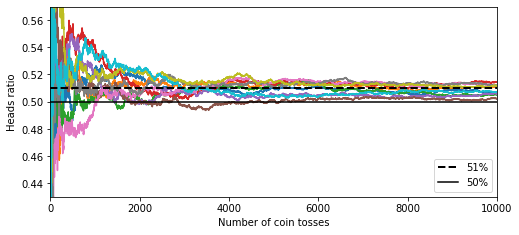

In [15]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.43, 0.57])
plt.show()

Similarly for classifiers, if you have a larger number of classifiers that are correct in 51% of cases, the majority vote classifier achieves an accuracy of about 75%, assuming perfectly independent errors.

Even if errors are correlated, accuracy of the hard voting is better than of each individual classifier - as long as errors are not perfectly dependent.

## Data sampling: Bagging and Pasting

*Idea*: Create ensemble by training same algorithm on random subsets of the training data.
* Bagging: Sampling with replacement
* Pasting: Sampling without replacement

![Bagging Illustration](img/ch7/bagging_illustration.png)

## Feature Sampling: Random Patches and Random Subspaces

*Idea*: Create ensemble by training the same algorithm on random subsets of features.
* Random Subspaces: Use the complete training data to train a model with a random selection of features 
* Random Patches: Combine data sampling with random subspaces

This is particularly useful in high-dimensional data

## Random Forests

Random forests uses data sampling (typically bagging) together with random feature sampling at every node of each tree in the ensemble.
XXX: At every node, are all features considered or is a random subset of the features in the parent node used???

### Extra Trees

*Extremely Randomized Trees* do not search for the best split at each node of the trees, but use a random threshold for each feature. The split is done by the feature that results in the lowest average impurity for the child node6s.

### Feature importance

Scikit-Learn measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). More precisely, it is a weighted average, where each node’s weight is equal to the number of training samples that are associated with it.

## Boosting

*Hypothesis boosting* refers to any ensemble method that can combine weak learners into a strong learner. Typically, a sequence of classifiers is trained in such a way that each subsequent classifiers corrects the errors of its predecessor.

![Boosting Illustration](img/ch7/boost_illustration.png)

### AdaBoost = Adaptive Boosting

*Idea*: Each model places more weights on observations that were misclassified by the previous models.

Initially, $w_0^{(i)} = \frac{1}{m}$

The weighted error of the j-th model is calculated as the sum of the weights of all misclassified observations relative to the total weight of all observations.

$$ r_j = \frac{\sum_{\hat{y}_j^{(i)} \neq y^{(i)}} w^{(i)}}{\sum w^{(i)}} $$

Next, the weight of the j-th model is calculated as

$$ \alpha_j = \eta \log \frac{1 - r_j}{r_j} $$

Finally, the weights of each observation are updated according to

$$ \tilde{w}_{j+1}^{(i)} = \begin{cases} w_j^{(i)} & \text{ if } \hat{y}_j^{(i)} = y^{(i)} \\ w_j^{(i)} \exp{\left(\alpha_j\right)} & \text{ if } \hat{y}_j^{(i)} \neq y^{(i)} \end{cases} $$

$$ w_{j+1}^{(i)} \frac{\tilde{w}_{j+1}^{(i)}}{\sum \tilde{w}_{j+1}^{(i)}} $$


Finally, to make predictions, the prediction of each model is weighted by $\alpha_j$ and the predicted class is determined by majority vote:

$$ \hat{y} = \text{argmax}_k \sum_{\hat{y}_j = k} \alpha_j $$

For regression tasks, the logic is the same, only that errors and weights are determined based on prediction errors. There are many different versions of Adaboost for regressions, see e.g. [here](https://datascience.stackexchange.com/questions/6949/how-will-ada-boost-be-used-for-solving-regression-problems).

### Gradient Boosting

*Idea*: Fit sequence of predictors to sequence of residuals.

*side note*: The reason that it is called gradient boosting is because the algorithms shares similarities with gradient descent in that a loss is sequentially lowered by following the direction of largest improvements.

# Stacking (= Stacked Generalization)

Idea: **Use a model to aggregate the individual predictions of the models in the ensemble**, rather than a simple rule (e.g. majority vote, averaging, etc.).

![Stacking Illustration](img/ch7/stacking_illustration.png)

To train the aggregation, or blender, model, a hold-out sample is used.

![Model Training](img/ch7/stacking_training.png)

![Blender Training](img/ch7/stacking_train_blending_layer.png)

This idea can be generalized, i.e. to train successive layers of models.

![Multi-Layer Stacking](img/ch7/stacking_multiple_layers.png)